# Household_power_consumption

**Attribute Information:**

1. date: Date in format dd/mm/yyyy <br> 
<br>
2. time: time in format hh:mm:ss <br>
<br>
3. global_active_power: household global minute-averaged active power (in kilowatt) <br>
<br>
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt) <br>
<br>
5. voltage: minute-averaged voltage (in volt) <br>
<br>
6. global_intensity: household global minute-averaged current intensity (in ampere) <br>
<br>
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). <br>
<br>
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.<br>
<br>
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner. <br>

In [88]:
# Importing then data and loading the lib

In [89]:
import numpy as np 
import pandas as pd

In [90]:
#df=pd.read_csv("household_power_consumption.txt",delimiter=';',)

In [91]:
#df.to_csv("household_power_consumption.csv",index=None)

In [92]:
#the data is too much so taking a 50,000 random sample

In [93]:
df=pd.read_csv('household_power_consumption.csv')

C:\Users\KIIT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [94]:
df=df.sample(50000)

In [95]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1816081,30/5/2010,21:25:00,2.182,0.174,239.580,9.000,0.000,0.000,19.0
10082,23/12/2006,17:26:00,4.848,0.140,232.450,20.800,1.000,1.000,16.0
576975,21/1/2008,09:39:00,1.546,0.084,239.360,6.400,0.000,1.000,18.0
636401,2/3/2008,16:05:00,2.408,0.000,238.250,10.400,0.000,29.000,0.0
616359,17/2/2008,18:03:00,1.428,0.000,235.020,6.200,0.000,0.000,0.0


In [96]:
df.shape

(50000, 9)

In [97]:
# Geting to know the columns

In [98]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [99]:
# CHecking there types

In [100]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [101]:
''' Date                      datatime
    Time                      datetime
    Global_active_power       float
    Global_reactive_power     float
    Voltage                   float
    Global_intensity          float
    Sub_metering_1            float
    Sub_metering_2            float
    Sub_metering_3           float64'''


' Date                      datatime\n    Time                      datetime\n    Global_active_power       float\n    Global_reactive_power     float\n    Voltage                   float\n    Global_intensity          float\n    Sub_metering_1            float\n    Sub_metering_2            float\n    Sub_metering_3           float64'

In [102]:
#Will drop date, time column before modeling and have to change all dtypes except the Sub_metering_3 

In [103]:
df['Sub_metering_1'].value_counts()

0.000     44319
1.000      2044
0.0         930
?           650
2.000       444
          ...  
60.000        1
67.000        1
76.000        1
54.0          1
34.0          1
Name: Sub_metering_1, Length: 98, dtype: int64

In [104]:
df[df['Sub_metering_1'] == '?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1935230,21/8/2010,15:14:00,?,?,?,?,?,?,NaN
1985114,25/9/2010,06:38:00,?,?,?,?,?,?,NaN
1985922,25/9/2010,20:06:00,?,?,?,?,?,?,NaN
1930957,18/8/2010,16:01:00,?,?,?,?,?,?,NaN
1932039,19/8/2010,10:03:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1617610,13/1/2010,01:34:00,?,?,?,?,?,?,NaN
192691,29/4/2007,12:55:00,?,?,?,?,?,?,NaN
192822,29/4/2007,15:06:00,?,?,?,?,?,?,NaN
1988056,27/9/2010,07:40:00,?,?,?,?,?,?,NaN


In [105]:
#droping them all

In [106]:
df.drop(df.loc[df['Sub_metering_1'] == '?'].index,inplace=True)

In [107]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [108]:
#No Null Values

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49350 entries, 1816081 to 994191
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   49350 non-null  object 
 1   Time                   49350 non-null  object 
 2   Global_active_power    49350 non-null  object 
 3   Global_reactive_power  49350 non-null  object 
 4   Voltage                49350 non-null  object 
 5   Global_intensity       49350 non-null  object 
 6   Sub_metering_1         49350 non-null  object 
 7   Sub_metering_2         49350 non-null  object 
 8   Sub_metering_3         49350 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [110]:
#Converting columnes types

In [111]:
col_to_convert=["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2"]

In [112]:
for col in col_to_convert:
    df[col] = df[col].astype(float)

In [113]:
#checking 

In [114]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [115]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1816081,30/5/2010,21:25:00,2.182,0.174,239.58,9.0,0.0,0.0,19.0
10082,23/12/2006,17:26:00,4.848,0.140,232.45,20.8,1.0,1.0,16.0
576975,21/1/2008,09:39:00,1.546,0.084,239.36,6.4,0.0,1.0,18.0
636401,2/3/2008,16:05:00,2.408,0.000,238.25,10.4,0.0,29.0,0.0
616359,17/2/2008,18:03:00,1.428,0.000,235.02,6.2,0.0,0.0,0.0


In [116]:
df['Date']=pd.to_datetime(df['Date'])
df['Time']

1816081    21:25:00
10082      17:26:00
576975     09:39:00
636401     16:05:00
616359     18:03:00
             ...   
761889     19:33:00
1298842    16:46:00
320784     11:48:00
1350502    13:46:00
994191     03:15:00
Name: Time, Length: 49350, dtype: object

In [117]:
df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [118]:
#Converting is done

In [119]:
#sorting the data by date

In [120]:
df.sort_values(by='Date',inplace=True)

In [121]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
323,2006-12-16,22:47:00,0.284,0.000,242.04,1.2,0.0,0.0,0.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
269,2006-12-16,21:53:00,3.480,0.170,236.46,14.6,0.0,2.0,17.0
37,2006-12-16,18:01:00,2.624,0.144,238.20,11.0,0.0,0.0,17.0
95,2006-12-16,18:59:00,4.224,0.090,231.96,18.2,0.0,1.0,16.0


In [122]:
#Adding Sub_metering_1	Sub_metering_2	Sub_metering_3

In [123]:
df['Total_bil'] = df["Sub_metering_1"] + df['Sub_metering_2'] + df['Sub_metering_3']

In [124]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_bil
323,2006-12-16,22:47:00,0.284,0.000,242.04,1.2,0.0,0.0,0.0,0.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,19.0
269,2006-12-16,21:53:00,3.480,0.170,236.46,14.6,0.0,2.0,17.0,19.0
37,2006-12-16,18:01:00,2.624,0.144,238.20,11.0,0.0,0.0,17.0,17.0
95,2006-12-16,18:59:00,4.224,0.090,231.96,18.2,0.0,1.0,16.0,17.0


In [127]:
import matplotlib.pyplot as plt
import seaborn as  sns 

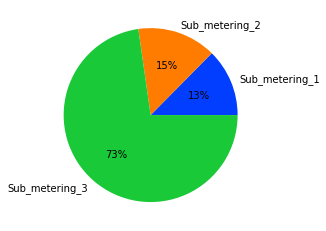

In [137]:
plt.pie(x=[df['Sub_metering_1'].sum(),df['Sub_metering_2'].sum(),df['Sub_metering_3'].sum()],
        labels=['Sub_metering_1','Sub_metering_2','Sub_metering_3'], 
        colors=sns.color_palette('bright'),
        autopct='%.0f%%')
plt.show()

In [138]:
# 73% of total bill come from Sub_metering_3 which corresponds to an electric water-heater and an air-conditioner.

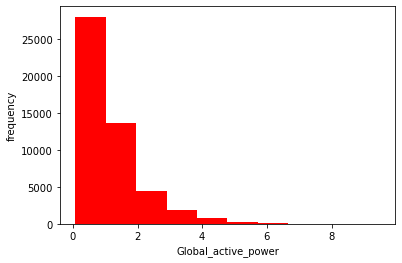

In [147]:
plt.hist(df["Global_active_power"],color='r')
plt.xlabel("Global_active_power")
plt.ylabel('frequency')
plt.show()

In [163]:
#geting Dayname from Date column

In [160]:
df['Dayname']=df["Date"].dt.day_name()

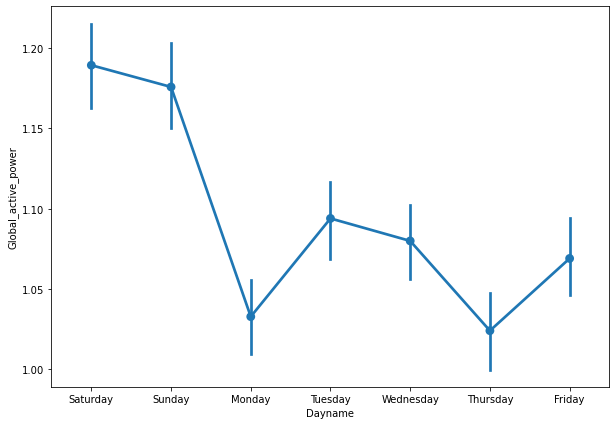

In [170]:
plt.figure(figsize=(10,7))
sns.pointplot(x='Dayname',y='Global_active_power',data=df)
plt.show()

In [172]:
#high global_activity_power in saturdays and sundays as it is a weekend

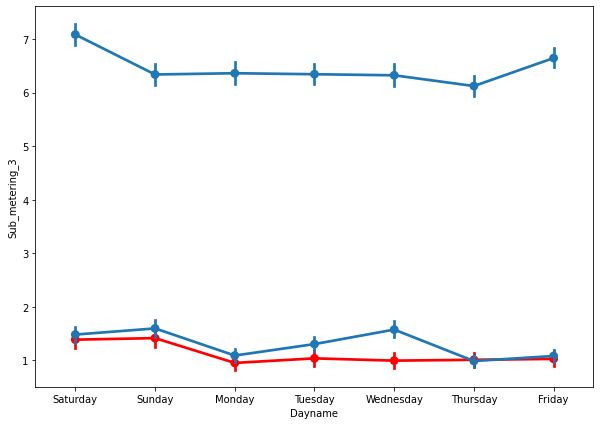

In [187]:
plt.figure(figsize=(10,7))

sns.pointplot(x='Dayname',y='Sub_metering_1',color='r',data=df)

sns.pointplot(x='Dayname',y='Sub_metering_2',colour='yellow',data=df)

sns.pointplot(x='Dayname',y='Sub_metering_3',data=df)
plt.show()


In [192]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_bil,Dayname
323,2006-12-16,22:47:00,0.284,0.000,242.04,1.2,0.0,0.0,0.0,0.0,Saturday
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,19.0,Saturday
269,2006-12-16,21:53:00,3.480,0.170,236.46,14.6,0.0,2.0,17.0,19.0,Saturday
37,2006-12-16,18:01:00,2.624,0.144,238.20,11.0,0.0,0.0,17.0,17.0,Saturday
95,2006-12-16,18:59:00,4.224,0.090,231.96,18.2,0.0,1.0,16.0,17.0,Saturday


**Model Building**

In [193]:
df.drop(['Date','Time','Dayname','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

In [194]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_bil
323,0.284,0.000,242.04,1.2,0.0
5,3.520,0.522,235.02,15.0,19.0
269,3.480,0.170,236.46,14.6,19.0
37,2.624,0.144,238.20,11.0,17.0
95,4.224,0.090,231.96,18.2,17.0


In [196]:
X = df.drop('Total_bil',axis=1)
y=df['Total_bil']

In [197]:
#Spleting the data 

In [198]:
from sklearn.model_selection import train_test_split

In [202]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
scaler = StandardScaler()
scaler

StandardScaler()

In [205]:
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

**LinearRegression**

In [206]:
from sklearn.linear_model import LinearRegression

In [207]:
model = LinearRegression()
model

LinearRegression()

In [208]:
model.fit(X_train,y_train)

LinearRegression()

In [219]:
print(f"The training score LinearRegression is: {model.score(X_train,y_train) * 100}")


The training score LinearRegression is: 71.62191038992474


In [220]:
y_pre = model.predict(x_test)

In [221]:
from sklearn.metrics import r2_score

In [222]:
print(f'The testing score of LinearRegression is: {r2_score(y_test,y_pre) * 100} ')

The testing score of LinearRegression is: 70.33965981871084 


**RidgeRegression**

In [226]:
from sklearn.linear_model import Ridge

In [227]:
model_1 = Ridge()
model_1

Ridge()

In [228]:
model_1.fit(X_train,y_train)

Ridge()

In [229]:
print(f"The training score RidgeRegression is: {model_1.score(X_train,y_train) * 100}")

The training score RidgeRegression is: 71.62164779318596


In [230]:
y_pre = model_1.predict(x_test)

In [231]:
print(f'The testing score of RidgeRegression is: {r2_score(y_test,y_pre) * 100} ')

The testing score of RidgeRegression is: 70.33683548756125 


**LassoRegression**

In [232]:
from sklearn.linear_model import Lasso

In [233]:
model_2 = Lasso()
model_2

Lasso()

In [234]:
model_2.fit(X_train,y_train)

Lasso()

In [235]:
print(f"The training score RidgeRegression is: {model_2.score(X_train,y_train) * 100}")

The training score RidgeRegression is: 70.86827538737074


In [236]:
y_pre = model_2.predict(x_test)

In [237]:
print(f'The testing score of RidgeRegression is: {r2_score(y_test,y_pre) * 100} ')

The testing score of RidgeRegression is: 69.7327688794338 


In [238]:
# acuracy got deacreased 

**Support Verctor Regressior**

In [239]:
from sklearn.svm import SVR

In [240]:
model_3 = SVR()
model_3

SVR()

In [241]:
model_3.fit(X_train,y_train)

SVR()

In [242]:
print(f"The training score RidgeRegression is: {model_3.score(X_train,y_train) * 100}")

The training score RidgeRegression is: 71.97658530424982


In [244]:
y_pre = model_3.predict(x_test)

In [245]:
print(f'The testing score of RidgeRegression is: {r2_score(y_test,y_pre) * 100} ')

The testing score of RidgeRegression is: 70.79971490169486 
